# NEURAL NETWORKS ASSIGNMENT 2 -SVMs

## Import libraries,load data and preprocess it

In [39]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.datasets import cifar10


# Load the Cifar-10 dataset
(X_train_orig, y_train), (X_test_orig, y_test) = cifar10.load_data()



#reshape data for correct input type for the model
X_train = X_train_orig.reshape((-1, 32*32*3)) 
X_test = X_test_orig.reshape((-1, 32*32*3))
#shrink y_train and y_test to one dimension
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

# Convert labels to one-hot encoded format
#y_train=keras.utils.to_categorical(y_train,num_classes=10)
#y_test=keras.utils.to_categorical(y_test,num_classes=10)

#scaling with MinMaxScaler or StandardScaler
#sc = StandardScaler()
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print("Train/test data shape:", X_train.shape, X_test.shape)
print("Train/test labels shape:", y_train.shape, y_test.shape)



Train/test data shape: (50000, 3072) (10000, 3072)
Train/test labels shape: (50000,) (10000,)


## Visualization of each class

Class: 0


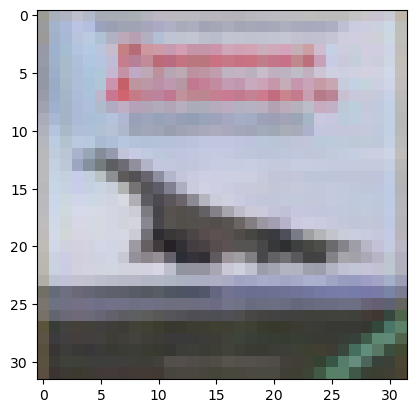

Class: 1


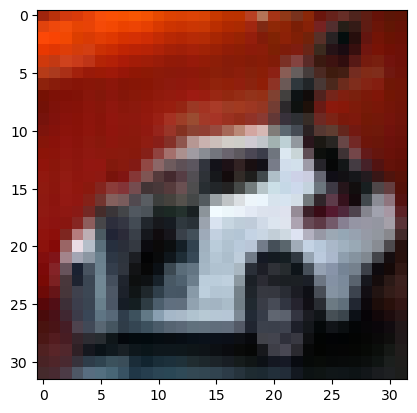

Class: 2


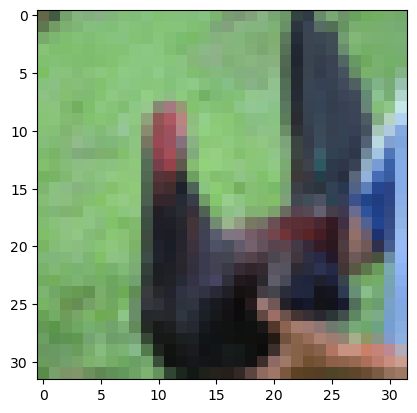

Class: 3


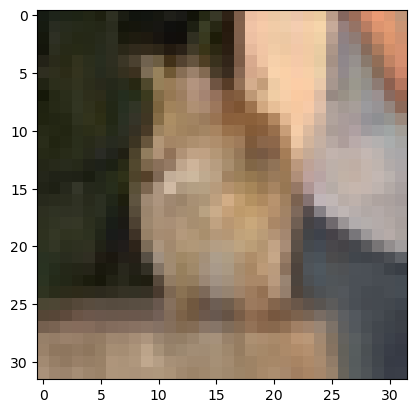

Class: 4


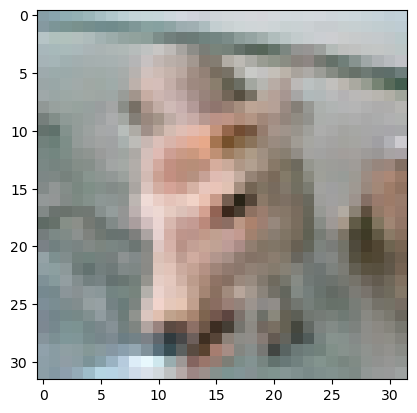

Class: 5


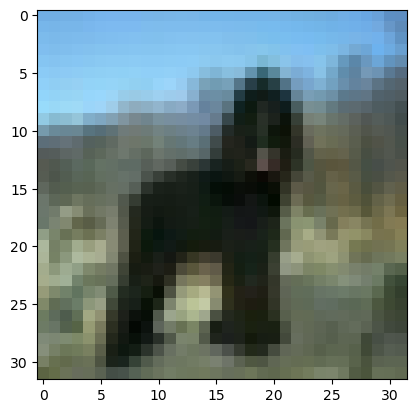

Class: 6


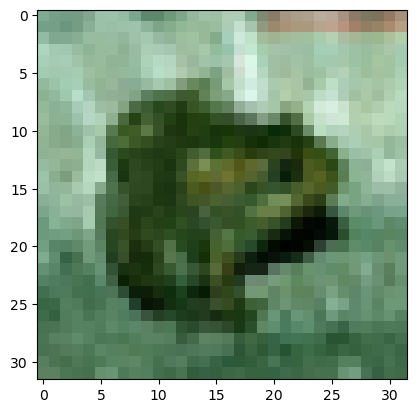

Class: 7


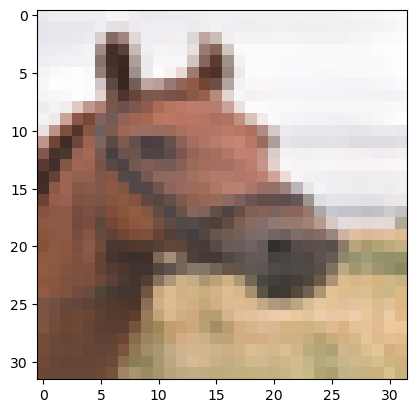

Class: 8


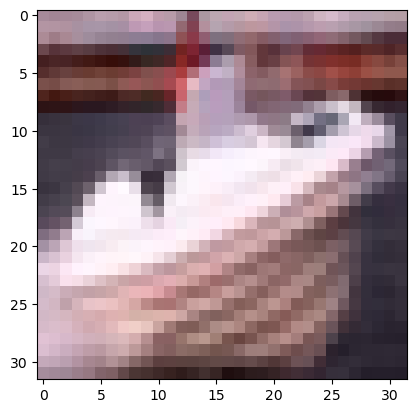

Class: 9


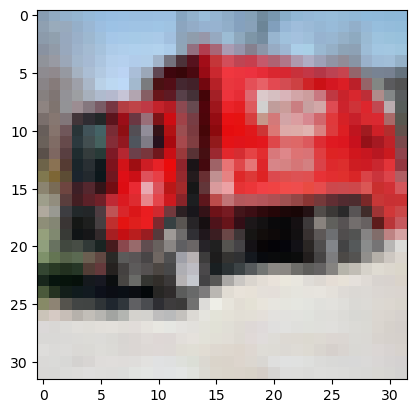

In [19]:
#number of class
i=0
#in the training set find each class and show the image
for j in range(X_train.shape[0]):
    if(y_test[j]==i):
        print("Class: "+str(i))
        i=i+1
        plt.imshow(X_test_orig[j]) #display sample training image with class i
        plt.show()
    if(i==10):
        break
        
    

## Set SVM model with sklearn

C:\Users\mdado\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Test accuracy: 0.2205
Training time: 12.3809 minutes
Correct classification:


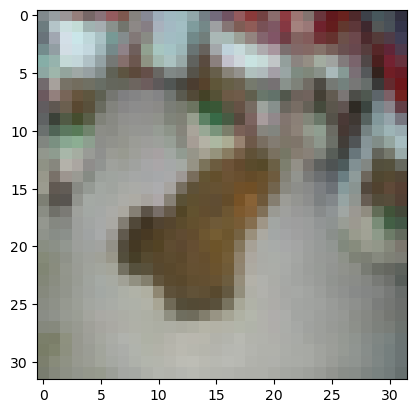

False classification:
Class is: 0 and was missclassified as 9


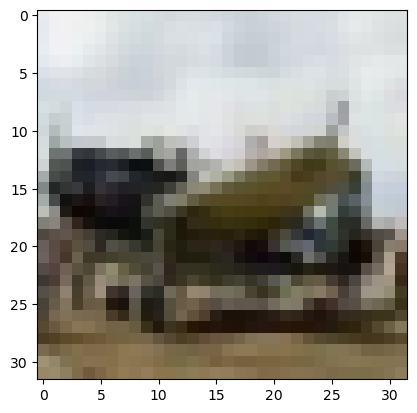

In [4]:

# Set up the SVM model
model = SVC(kernel='linear', C=1.0, tol=0.001,max_iter=500)
#model = SVC(kernel='rbf', C=1.0, gamma=0.05,tol=0.001,max_iter=50)
#model = SVC(kernel='poly', C=1.0, degree=3,tol=0.001,max_iter=2000)


# Train the model and measure time of training
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
training_minutes=training_time/60

# Evaluate the model on the test set
y_pred = model.predict(X_test)
test_accuracy =  model.score(X_test, y_test)

# Print the accuracy and training time
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Training time: {training_minutes:.4f} minutes")

#find examples of correct and false classification

correct_indices = [i for i in range(500) if y_pred[i] == y_test[i]]
false_indices = [i for i in range(500) if y_pred[i] != y_test[i]]

print("Correct classification:")
index=random.randint(0, len(correct_indices))
plt.imshow(X_test_orig[index]) #display sample training image
plt.show()

print("False classification:")
index=random.randint(0, len(false_indices))
print("Class is: "+str(y_test[index])+" and was missclassified as "+str(y_pred[index]))
plt.imshow(X_test_orig[index]) #display sample training image
plt.show()




## Different scalings,models and  different hyperparameters

### A)Comparing MinMaxScaler and StandardScaler for same models 

#### Conclusion:StandardScaler is better for SVMs with rbf kernel and MinMaxScaler is better with SVMs with poly and linear kernel 

### B)SVM with rbf kernel,StandardScaler,C=1,tol=0.001 tuning gamma hyperparameter and max_iter

#### Conclusion:Best value for gamma is 0.1-0.2 and with more and more iterations the model has better accuracy

### C)SVM with poly kernel,MinMaxScaler,C=1,tol=0.001 tuning degree hyperparameter and max_iter

#### Conclusion:Best value for degree is 2 and with more and more iterations the model has better accuracy

### D)SVM with linear kernel,MinMaxScaler,C=1,tol=0.001 tuning  max_iter

#### Conclusion:With more iterations the model has better accuracy

### E)Comparing with KNN and NCC results

#### 1)KNN

In [40]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Applying PCA function for n_components=2
pca = PCA(n_components = 32)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#setting how many neighbors to look
neighbors=3
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=neighbors)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict for test dataset
y_predk = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predk))


Accuracy: 0.3847


C:\Users\mdado\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Accuracy of KNN algorithm for different n_components at PCA before the training(best value=32)

#### 2)NCC

In [41]:
from sklearn.neighbors import NearestCentroid

#Create NearestCentroid Classifier
model = NearestCentroid()
#Train the model using the training sets
model.fit(X_train, y_train)
#Predict for test dataset
y_predk=model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predk))


Accuracy: 0.2758


#### Accuracy of NCC algorithm for different n_components at PCA before the training(best value=256)

#### Conclusion SVMs can have the same and better accuracy than KNN and NCC (after more iterations they can reach 0.385 accuracy of KNN)